In [1]:
import sys
sys.path.append('../30_data_tools/')

In [18]:
import plotly.express as px
import json
from datetime import datetime

In [4]:
from file_interaction import download_blob, get_blobs

In [40]:
available_experiments = get_blobs(filter='train_logs/')
available_experiments

['train_logs/2024-04-02_resnet50.json',
 'train_logs/2024-04-02_resnet50_001.json',
 'train_logs/2024-04-02_resnet50_002.json',
 'train_logs/2024-04-03_resnet50_001.json',
 'train_logs/2024-04-03_resnet50_002.json']

In [42]:
def load_experiment( experiment_name ):
    json_buffer = download_blob( f'train_logs/{ experiment_name }.json' )
    data = json.loads( json_buffer.getvalue() )
    data['start_timestamp'] = datetime.fromisoformat(data['start_timestamp'])

    if 'end_timestamp' in data:
        data['end_timestamp'] = datetime.fromisoformat(data['end_timestamp'])

    for t in data['tracked_metrics']:
        t['timestamp'] = datetime.fromisoformat(t['timestamp'])
        t['value'] = float(t['value'])
    
    return data

In [43]:
experiment_name = '2024-04-03_resnet50_002'
experiment_data = load_experiment( experiment_name )

In [44]:
experiment_data['hyper_parameters']

{'epochs': 25,
 'learning_rate': 0.0001,
 'batch_size': 64,
 'loss_function': 'CrossEntropyLoss',
 'metric_functions': ['MulticlassAccuracy',
  'MulticlassRecall',
  'MulticlassPrecision'],
 'optimizer': 'SGD',
 'device': 'cpu'}

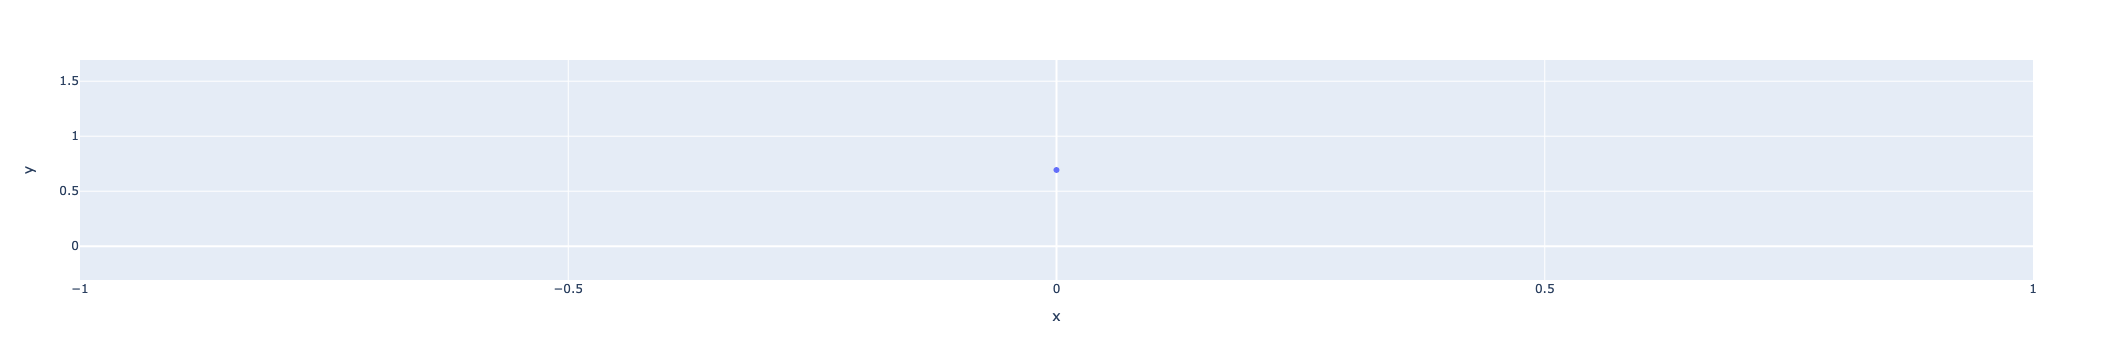

In [45]:
px.scatter(
    x=[t['step'] for t in experiment_data['tracked_metrics'] if t['metric_name'] == 'loss' and t['mode'] == 'train'],
    y=[t['value'] for t in experiment_data['tracked_metrics'] if t['metric_name'] == 'loss' and t['mode'] == 'train']
)